# Giải thích chi tiết từng cell

**Cell 1:** Tải bộ dữ liệu Boston Housing từ URL, đặt tên các cột và hiển thị kích thước dữ liệu.

**Cell 2:** Hiển thị thống kê mô tả và hệ số tương quan giữa các thuộc tính với giá nhà (MEDV).

**Cell 3:** Vẽ biểu đồ boxplot cho từng thuộc tính và scatter matrix để quan sát phân phối, mối quan hệ giữa các thuộc tính.

**Cell 4:** Tách dữ liệu thành tập huấn luyện và kiểm tra (train/test split).

**Cell 5:** Khởi tạo các mô hình hồi quy, đánh giá bằng cross-validation với scoring là MSE, in kết quả từng mô hình.

**Cell 6:** Chuẩn hóa dữ liệu huấn luyện bằng StandardScaler, chuẩn bị cho các bước đánh giá tiếp theo.

**Cell 7:** Tìm kiếm tham số tối ưu cho mô hình SVR bằng GridSearchCV trên dữ liệu đã chuẩn hóa.

**Cell 8:** Khởi tạo các mô hình ensemble (Random Forest, Gradient Boosting), chuẩn bị đánh giá tương tự như các mô hình trước.

**Cell 9:** Tìm kiếm tham số tối ưu cho GradientBoostingRegressor bằng GridSearchCV.

**Cell 10:** Huấn luyện mô hình GradientBoostingRegressor với tham số tối ưu, dự đoán trên tập kiểm tra, tính MSE và lưu mô hình bằng pickle.

In [1]:
from pandas import read_csv
from matplotlib import pyplot
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(url, delim_whitespace=True, names=names)
print(dataset.shape)

C:\Users\HUONG\AppData\Local\Temp\ipykernel_3676\1233866861.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv(url, delim_whitespace=True, names=names)


(506, 14)


In [2]:
print(dataset.describe())
print(dataset.corr()[['MEDV']].sort_values('MEDV', ascending=False))

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

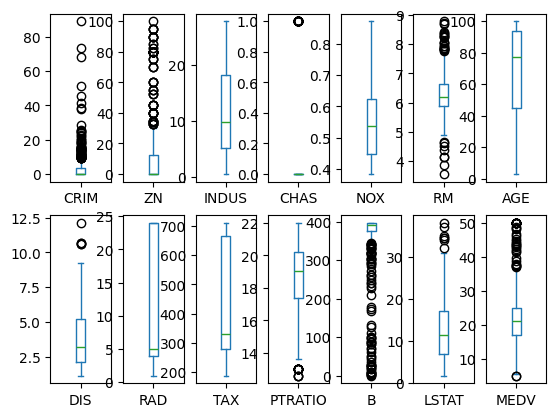

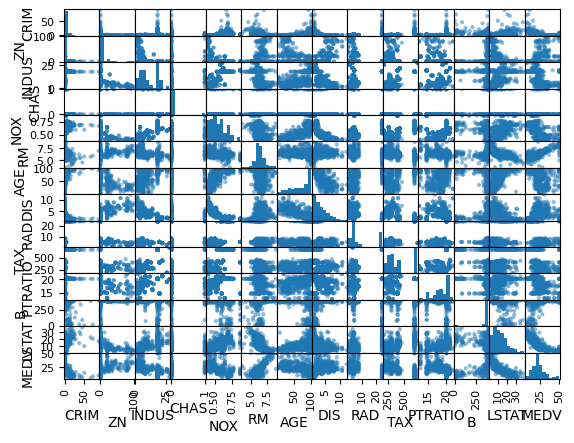

In [3]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
pyplot.show()

from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
pyplot.show()

In [4]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'neg_mean_squared_error'
results = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print(f'{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})')

LR: -22.006 (12.189)
Ridge: -22.040 (12.551)
Lasso: -27.106 (13.166)
DT: -28.025 (18.884)
KNN: -39.809 (16.508)
SVR: -67.825 (32.802)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
# Lặp lại cross_val_score trên X_train_scaled

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1], 'epsilon': [0.01, 0.1]}
model = SVR()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train_scaled, Y_train)
print(grid.best_score_)

0.6477348025838645


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

ensembles = []
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('GBM', GradientBoostingRegressor(n_estimators=10)))
# Tương tự cross_val_score

In [9]:
param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid)
grid.fit(X_train_scaled, Y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.05, 0.1], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(scaler.transform(X_validation))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_validation, predictions))
# Save với pickle (Chapter 17)
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

10.81611770430561


: 